<a href="https://colab.research.google.com/github/samriddhikaswa/ML_PROJECTS_17/blob/main/ML3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Step 1: Import libraries
import pandas as pd
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    mean_absolute_error,
    mean_squared_error,
    roc_curve
)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
# Step 2: Upload the file manually
uploaded = files.upload()

Saving customer_churn_dataset-testing-master.csv to customer_churn_dataset-testing-master.csv


In [5]:
# Step 3: Load the dataset
# Automatically fetch the uploaded file name
file_path = list(uploaded.keys())[0]
data = pd.read_csv(file_path)

In [6]:
# Step 4: Data preprocessing
# Drop non-predictive column
data = data.drop(columns=["CustomerID"])

# Encode categorical variables
categorical_cols = ["Gender", "Subscription Type", "Contract Length"]
label_encoders = {col: LabelEncoder() for col in categorical_cols}

for col in categorical_cols:
    data[col] = label_encoders[col].fit_transform(data[col])

# Separate features and target variable
X = data.drop(columns=["Churn"])
y = data["Churn"]

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [7]:
# Step 5: Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred_tree = clf.predict(X_test)
y_proba_tree = clf.predict_proba(X_test)[:, 1]  # Probability predictions for ROC-AUC

In [8]:
# Step 6: Logistic Regression Classifier
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_logreg = log_reg.predict(X_test)
y_proba_logreg = log_reg.predict_proba(X_test)[:, 1]  # Probability predictions for ROC-AUC


In [9]:
# Step 7: Decision Tree Regressor
reg = DecisionTreeRegressor(random_state=42)
reg.fit(X_train, y_train)
y_pred_reg = reg.predict(X_test)


Confusion Matrix for Decision Tree Classifier:


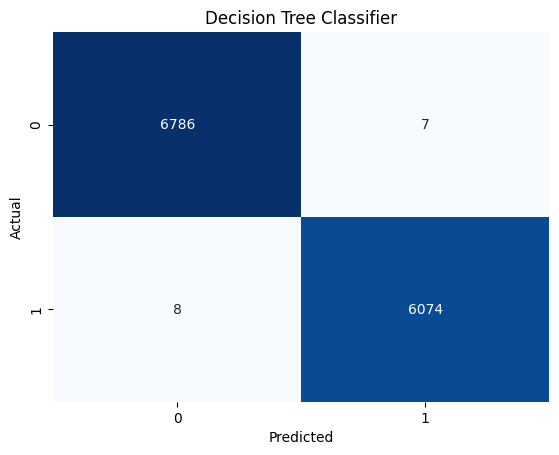


Confusion Matrix for Logistic Regression:


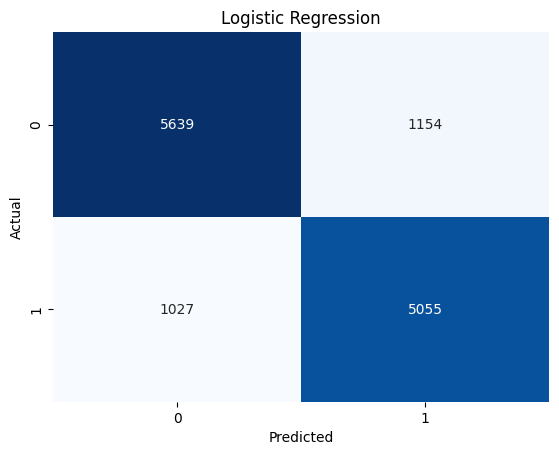

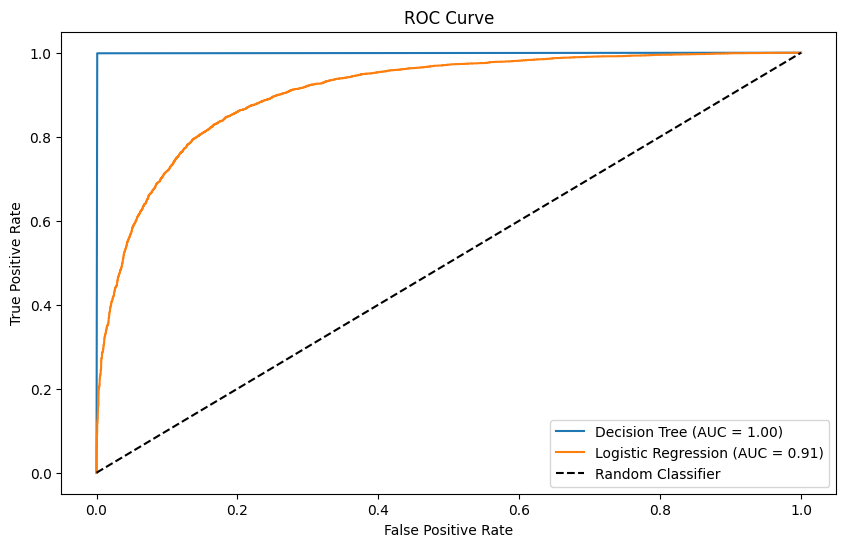

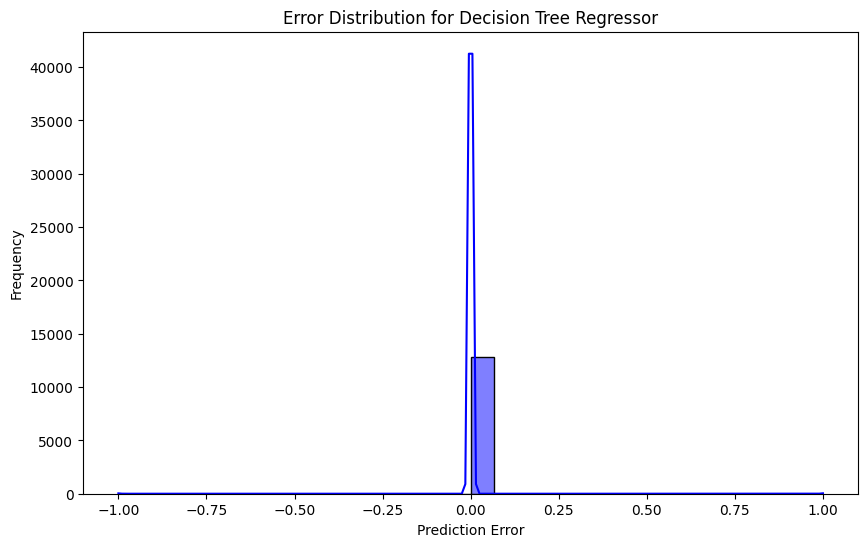

In [10]:
# Step 8: Visualizations
# 1. Confusion Matrix Heatmaps
def plot_confusion_matrix(cm, title):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

print("\nConfusion Matrix for Decision Tree Classifier:")
cm_tree = confusion_matrix(y_test, y_pred_tree)
plot_confusion_matrix(cm_tree, "Decision Tree Classifier")

print("\nConfusion Matrix for Logistic Regression:")
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
plot_confusion_matrix(cm_logreg, "Logistic Regression")

# 2. ROC Curve
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_proba_tree)
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_proba_logreg)

plt.figure(figsize=(10, 6))
plt.plot(fpr_tree, tpr_tree, label="Decision Tree (AUC = {:.2f})".format(roc_auc_score(y_test, y_proba_tree)))
plt.plot(fpr_logreg, tpr_logreg, label="Logistic Regression (AUC = {:.2f})".format(roc_auc_score(y_test, y_proba_logreg)))
plt.plot([0, 1], [0, 1], "k--", label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# 3. Error Distribution for Regression
errors = y_test - y_pred_reg
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True, bins=30, color="blue")
plt.title("Error Distribution for Decision Tree Regressor")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.show()


In [11]:
# Step 9: Print Metrics
print("Decision Tree Classifier Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Precision:", precision_score(y_test, y_pred_tree))
print("Recall:", recall_score(y_test, y_pred_tree))
print("F1-Score:", f1_score(y_test, y_pred_tree))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_tree))

print("\nLogistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Precision:", precision_score(y_test, y_pred_logreg))
print("Recall:", recall_score(y_test, y_pred_logreg))
print("F1-Score:", f1_score(y_test, y_pred_logreg))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_logreg))

print("\nDecision Tree Regressor Metrics:")
print("MAE:", mean_absolute_error(y_test, y_pred_reg))
print("MSE:", mean_squared_error(y_test, y_pred_reg))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_reg)))

Decision Tree Classifier Metrics:
Accuracy: 0.9988349514563106
Precision: 0.9988488735405361
Recall: 0.9986846432094706
F1-Score: 0.998766751623777
ROC-AUC: 0.9988270853321016

Logistic Regression Metrics:
Accuracy: 0.8306019417475728
Precision: 0.8141407634079562
Recall: 0.8311410720157842
F1-Score: 0.8225530876250915
ROC-AUC: 0.9079249278458642

Decision Tree Regressor Metrics:
MAE: 0.0011650485436893205
MSE: 0.0011650485436893205
RMSE: 0.03413280743931446
